###Set up spark context and SparkSession

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark regression example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

###Load dataset

In [0]:
df = spark.read.format('com.databricks.spark.csv').\
                       options(header='true', \
                       inferschema='true').\
            load("/FileStore/tables/taxi_data_sub_Finalsample.csv",header=True);

#####check the data set

In [0]:
df.printSchema()

root
 |-- vendorid: integer (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- ratecodeid: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- pulocationid: integer (nullable = true)
 |-- dolocationid: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- borough_pu: string (nullable = true)
 |-- median_rlst_pu: integer (nullable = true)
 |-- tourist_pu: integer (nullable = true)
 |-- entert_pu: integer (nullable = true)


#####Statistical results from the data frame

In [0]:
# df.select("fare_amount").summary("count", "min", "25%","50%", "mean", "75%", "max", "stddev").show()
# df.select("tip_amount").summary("count", "min", "25%","50%", "mean", "75%", "max", "stddev").show()

In [0]:
df=df.dropna()
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
vendorid,149999,1.6669711131407543,0.47256972416862486,1,4
tpep_pickup_datetime,149999,None,None,1/1/20 0:02,9/9/19 9:57
tpep_dropoff_datetime,149999,None,None,1/1/20 0:08,9/9/19 9:53
passenger_count,149999,1.5489969933132888,1.1565302178555017,1,6
trip_distance,149999,3.0377479183194582,3.9076759333280537,0.01,96.61
ratecodeid,149999,1.0464269761798413,0.29685977373539096,1,5
store_and_fwd_flag,149999,None,None,N,Y
pulocationid,149999,164.4577630517537,65.49503021124471,1,265
dolocationid,149999,162.36969579797199,69.70077126709803,1,265


#####Data Preprocessing - Adding Columns - fare_amount_category,tip_category, paytment_type_category, trip_duration, pickup_time, and dropoff_time

In [0]:
import pandas as pd
import numpy as np
from pyspark.sql.functions import datediff,date_format,to_date,to_timestamp
from pyspark.sql.functions import *
from pyspark.sql.functions import hour, minute, dayofweek
from pyspark.sql import functions as F
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

df=df.withColumn('tpep_pickup_datetime',to_timestamp(df.tpep_pickup_datetime, 'MM/dd/yy HH:mm')).\
                withColumn('tpep_dropoff_datetime',to_timestamp(df.tpep_dropoff_datetime, 'MM/dd/yy HH:mm')).\
                withColumn("pickup_time", round((hour(col("tpep_pickup_datetime")) + (minute(col("tpep_pickup_datetime"))/60)),2)).\
                withColumn("pickup_hour", hour(col("tpep_pickup_datetime"))).\
                withColumn("pickup_day", col("date")).\
                withColumn("pickup_day_of_week",dayofweek(col("tpep_pickup_datetime"))).\
                withColumn("pickup_month", col("month")).\
                withColumn("pickup_year", col("year")).\
                withColumn("dropoff_time", round((hour(col("tpep_dropoff_datetime")) + (minute(col("tpep_dropoff_datetime"))/60)),2)).\
                withColumn('trip_duration',round((col('dropoff_time') - col('pickup_time')),2)).\
                withColumn("tip_category", F.when(df.tip_amount == 0.0, 'Zero Tip').when(( (df.tip_amount > 0.0) & (df.tip_amount <= 1.75)), 'Low Tip').when(( (df.tip_amount > 1.75) & (df.tip_amount <= 3.45)), 'Medium Tip').when(df.tip_amount > 3.45, 'High Tip').otherwise('N/A')).\
                withColumn("payment_type_category", F.when(df.payment_type == 1, 'Credit card').when(df.payment_type == 2, 'Cash').when(df.payment_type == 3, 'No charge').when(df.payment_type == 4, 'Dispute').when(df.payment_type == 5, 'Unknown').when(df.payment_type == 6, 'Voided trip').otherwise('N/A'))

df = df.drop('tpep_pickup_datetime','tpep_dropoff_datetime')
display(df)



vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,borough_pu,median_rlst_pu,tourist_pu,entert_pu,park_pu,workplace_pu,residential_pu,borough_do,median_rlst_do,tourist_do,entert_do,park_do,workplace_do,residential_do,rate_fare,temperature,humidity,wind speed,pressure,precip,condition,date,year,month,trip_time,covid,pickup_time,pickup_hour,pickup_day,pickup_day_of_week,pickup_month,pickup_year,dropoff_time,trip_duration,tip_category,payment_type_category
2,1,6.15,1,N,262,244,1,23.5,0.0,0.5,2.5,0.0,0.3,29.3,2.5,Manhattan,0,0,1,0,0,0,Manhattan,603593,0,0,0,0,1,3.821138211,42,89,10,30.16,0.0,Light Rain,12/9/19,2019,12,-441.75,0,7.35,7,12/9/19,2,12,2019,7.77,0.42,Medium Tip,Credit card
2,2,1.17,1,N,233,107,1,6.5,1.0,0.5,1.0,0.0,0.3,11.8,2.5,Manhattan,0,0,0,0,1,0,Manhattan,0,0,0,1,0,0,5.555555556,79,38,18,29.88,0.0,Fair,8/29/19,2019,8,-1088.666667,0,18.13,18,8/29/19,5,8,2019,18.25,0.12,Low Tip,Credit card
2,1,6.2,1,N,261,162,1,20.5,1.0,0.5,4.96,0.0,0.3,29.76,2.5,Manhattan,0,1,0,0,0,0,Manhattan,0,0,1,0,0,0,3.306451613,83,41,16,29.76,0.0,Fair,7/12/19,2019,7,-1188.15,0,19.8,19,7/12/19,6,7,2019,20.05,0.25,High Tip,Credit card
2,1,2.32,1,N,79,170,1,11.0,1.0,0.5,3.06,0.0,0.3,18.36,2.5,Manhattan,0,0,1,0,0,0,Manhattan,0,0,1,0,0,0,4.74137931,44,71,10,29.61,0.0,Mostly Cloudy,12/31/19,2019,12,-1147.766667,0,19.12,19,12/31/19,3,12,2019,19.33,0.21,Medium Tip,Credit card
2,2,1.41,1,N,179,146,1,6.5,0.0,0.5,1.0,0.0,0.3,8.3,0.0,Queens,642130,0,0,0,0,1,Queens,1318454,0,0,0,0,1,4.609929078,68,65,12,30.2,0.0,Mostly Cloudy,9/9/19,2019,9,-532.0166667,0,8.87,8,9/9/19,2,9,2019,8.97,0.1,Low Tip,Credit card
1,1,2.9,1,N,75,162,1,13.0,2.5,0.5,3.25,0.0,0.3,19.55,2.5,Manhattan,1360925,0,0,0,0,1,Manhattan,0,0,1,0,0,0,4.482758621,33,66,12,29.83,0.0,Fair,12/18/19,2019,12,-478.5166667,0,7.97,7,12/18/19,4,12,2019,8.25,0.28,Medium Tip,Credit card
2,2,4.81,1,N,68,263,1,23.0,1.0,0.5,3.0,0.0,0.3,30.3,2.5,Manhattan,0,0,1,0,0,0,Manhattan,0,0,1,0,0,0,4.781704782,75,23,14,30.06,0.0,Fair,9/17/19,2019,9,-1063.95,0,17.72,17,9/17/19,3,9,2019,18.3,0.58,Medium Tip,Credit card
1,2,2.2,1,N,148,164,1,10.0,3.0,0.5,2.75,0.0,0.3,16.55,2.5,Manhattan,0,0,1,0,0,0,Manhattan,0,0,1,0,0,0,4.545454545,41,70,5,29.72,0.0,Light Rain,11/23/19,2019,11,-10.98333333,0,0.17,0,11/23/19,7,11,2019,0.37,0.2,Medium Tip,Credit card
2,5,1.37,1,N,237,43,1,7.0,0.0,0.5,2.06,0.0,0.3,12.36,2.5,Manhattan,0,0,1,0,0,0,Manhattan,0,1,0,1,0,0,5.109489051,92,54,13,29.83,0.0,Fair,7/17/19,2019,7,-946.9,0,15.77,15,7/17/19,4,7,2019,15.9,0.13,Medium Tip,Credit card
2,1,0.94,1,N,164,163,1,9.0,0.0,0.5,2.46,0.0,0.3,14.76,2.5,Manhattan,0,0,1,0,0,0,Manhattan,0,0,1,0,0,0,9.574468085,73,81,13,30.06,0.0,Cloudy,9/12/19,2019,9,-860.6,0,14.33,14,9/12/19,5,9,2019,14.55,0.22,Medium Tip,Credit card


### Fare_amount - Correlation Analysis

In [0]:
import six
for i in df.columns:
    if not(isinstance(df.select(i).take(1)[0][0], six.string_types)):
           print( "Correlation to fare_amount for ", i, df.stat.corr('fare_amount',i))


Correlation to fare_amount for  vendorid 0.020253659263460094
Correlation to fare_amount for  passenger_count 0.01321315713473028
Correlation to fare_amount for  trip_distance 0.9352734580552181
Correlation to fare_amount for  ratecodeid 0.6239944887687744
Correlation to fare_amount for  pulocationid -0.09138661677900466
Correlation to fare_amount for  dolocationid -0.10071774415823843
Correlation to fare_amount for  payment_type 0.007189837096373453
Correlation to fare_amount for  fare_amount 1.0
Correlation to fare_amount for  extra -0.020760671577553378
Correlation to fare_amount for  mta_tax -0.3096323325752933
Correlation to fare_amount for  tip_amount 0.7495901342541721
Correlation to fare_amount for  tolls_amount 0.6554120971142489
Correlation to fare_amount for  improvement_surcharge -0.02745115042064833
Correlation to fare_amount for  total_amount 0.9848316117084356
Correlation to fare_amount for  congestion_surcharge -0.2803238433603919
Correlation to fare_amount for  median_

####Correlation Analysis
#####The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; When the coefficient is close to –1, it means that there is a strong negative correlation; Finally, coefficients close to zero mean that there is no linear correlation.
-> for example, the fare amount tends to go up when the tip distance goes up. 

● In an ideal scenario, we can say that the Distance Travelled and Taxi Fare should be linearly related. But, it is very obvious that there are a lot of external factors that affect the relation between the two and hence we cannot say that they are completely linearly related.

● Also, as we know the Correlation depicts the strength of linearity between different parameters. A  Correlation of ​0.8257585563383683 does indicate quite a strong linear correlation between the Distance Travelled and Taxi Fare.

###Convert the data to dense vector (features and label)

#####Dealing with the categorical data in comple dataset

In [0]:
def get_dummy(df,categoricalCols,continuousCols,labelCol):

    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
    from pyspark.sql.functions import col

    indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
                 for c in categoricalCols ]

    # default setting: dropLast=True
    encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
                 outputCol="{0}_encoded".format(indexer.getOutputCol()))
                 for indexer in indexers ]

    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                                + continuousCols, outputCol="features")

    pipeline = Pipeline(stages=indexers + encoders + [assembler])

    model=pipeline.fit(df_data)
    data = model.transform(df_data)

    data = data.withColumn('label',col(labelCol))

    return data.select('features','label')

In [0]:

df_data = df.select(['tip_amount', 'tolls_amount', 'passenger_count','pickup_day', 'pickup_hour', 'pickup_day_of_week','precip', 'temperature','humidity', 'condition','tip_category'])

catcols = ['condition', 'pickup_day']
num_cols = ['tip_amount', 'tolls_amount', 'passenger_count', 'pickup_hour', 'pickup_day_of_week','precip', 'temperature','humidity']
labelCol = 'tip_category'

data = get_dummy(df_data,catcols,num_cols,labelCol)
data.show(10)

+--------------------+----------+
|            features|     label|
+--------------------+----------+
|(410,[4,162,402,4...|Medium Tip|
|(410,[1,206,402,4...|   Low Tip|
|(410,[1,174,402,4...|  High Tip|
|(410,[0,278,402,4...|Medium Tip|
|(410,[0,169,402,4...|   Low Tip|
|(410,[1,37,402,40...|Medium Tip|
|(410,[1,135,402,4...|Medium Tip|
|(410,[4,96,402,40...|Medium Tip|
|(410,[1,104,402,4...|Medium Tip|
|(410,[2,61,402,40...|Medium Tip|
+--------------------+----------+
only showing top 10 rows



In [0]:
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.util import MLUtils
from pyspark.ml.linalg import Vectors

# Index labels, adding metadata to the label column
labelIndexer = StringIndexer(inputCol='label',
                             outputCol='indexedLabel').fit(data)
labelIndexer.transform(data).show(5, True)

+--------------------+----------+------------+
|            features|     label|indexedLabel|
+--------------------+----------+------------+
|(410,[4,162,402,4...|Medium Tip|         0.0|
|(410,[1,206,402,4...|   Low Tip|         2.0|
|(410,[1,174,402,4...|  High Tip|         1.0|
|(410,[0,278,402,4...|Medium Tip|         0.0|
|(410,[0,169,402,4...|   Low Tip|         2.0|
+--------------------+----------+------------+
only showing top 5 rows



In [0]:
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =VectorIndexer(inputCol="features", \
                              outputCol="indexedFeatures", \
                              maxCategories=4).fit(data)
featureIndexer.transform(data).show(5, True)


+--------------------+----------+--------------------+
|            features|     label|     indexedFeatures|
+--------------------+----------+--------------------+
|(410,[4,162,402,4...|Medium Tip|(410,[4,162,402,4...|
|(410,[1,206,402,4...|   Low Tip|(410,[1,206,402,4...|
|(410,[1,174,402,4...|  High Tip|(410,[1,174,402,4...|
|(410,[0,278,402,4...|Medium Tip|(410,[0,278,402,4...|
|(410,[0,169,402,4...|   Low Tip|(410,[0,169,402,4...|
+--------------------+----------+--------------------+
only showing top 5 rows



#####Split the data into training and test sets (30% held out for testing)

In [0]:
# Split the data into training and test sets (30% held out for testing)
train, test =data.randomSplit([0.7,0.3])

#### Train & Fit Decision Tree, Random Forest and Naive Bayes Classification Model

In [0]:
# Import the required libraries

from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import NaiveBayes

# Train a DecisionTree model
dTree = DecisionTreeClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# Train a Naive Bayes Classification model.
nb = NaiveBayes(featuresCol='indexedFeatures', labelCol='indexedLabel')


#####Pipeline Architecture

In [0]:

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)
# Chain indexers and tree in a Pipeline
pipeline_dt = Pipeline(stages=[labelIndexer, featureIndexer, dTree,labelConverter])
pipeline_rf = Pipeline(stages=[labelIndexer, featureIndexer, rf,labelConverter])
pipeline_nb = Pipeline(stages=[labelIndexer, featureIndexer, nb,labelConverter])

# Train model. This also runs the indexers.
model_dt = pipeline_dt.fit(train)
model_rf = pipeline_rf.fit(train)
model_nb = pipeline_nb.fit(train)



### Make predictions

In [0]:
# Make predictions.
predictions_dt = model_dt.transform(test)
predictions_rf = model_rf.transform(test)
predictions_nb = model_nb.transform(test)

# Select example rows to display.
predictions_dt.select("features","label","predictedLabel").show(5)
predictions_rf.select("features","label","predictedLabel").show(5)
predictions_nb.select("features","label","predictedLabel").show(5)

+--------------------+----------+--------------+
|            features|     label|predictedLabel|
+--------------------+----------+--------------+
|(410,[0,37,402,40...|  High Tip|      High Tip|
|(410,[0,37,402,40...|   Low Tip|       Low Tip|
|(410,[0,37,402,40...|   Low Tip|       Low Tip|
|(410,[0,37,402,40...|Medium Tip|    Medium Tip|
|(410,[0,37,404,40...|  Zero Tip|      Zero Tip|
+--------------------+----------+--------------+
only showing top 5 rows

+--------------------+----------+--------------+
|            features|     label|predictedLabel|
+--------------------+----------+--------------+
|(410,[0,37,402,40...|  High Tip|      High Tip|
|(410,[0,37,402,40...|   Low Tip|    Medium Tip|
|(410,[0,37,402,40...|   Low Tip|    Medium Tip|
|(410,[0,37,402,40...|Medium Tip|    Medium Tip|
|(410,[0,37,404,40...|  Zero Tip|    Medium Tip|
+--------------------+----------+--------------+
only showing top 5 rows

+--------------------+----------+--------------+
|            featur

####Evaluation

In [0]:


from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy_dt = evaluator.evaluate(predictions_dt)
accuracy_rf = evaluator.evaluate(predictions_rf)
accuracy_nb = evaluator.evaluate(predictions_nb)

print("Decesion Tree Test Error = %g" % (1.0 - accuracy_dt))
print("Random Forest Model Test Error = %g" % (1.0 - accuracy_rf))
print("Naive Bayes Model Test Error = %g" % (1.0 - accuracy_nb))

dtModel = model.stages[-2]
rfModel = model_rf.stages[-2]
nbModel = model_nb.stages[-2]

print(dtModel)
print(rfModel) 
print(nbModel)# summary only

Decesion Tree Test Error = 0.00742541
Random Forest Model Test Error = 0.451456
Naive Bayes Model Test Error = 0.374013
RandomForestClassificationModel: uid=RandomForestClassifier_67e0d3ee5a47, numTrees=10, numClasses=4, numFeatures=410
RandomForestClassificationModel: uid=RandomForestClassifier_42412d7e3ec9, numTrees=10, numClasses=4, numFeatures=410
NaiveBayesModel: uid=NaiveBayes_929e1ed8fb55, modelType=multinomial, numClasses=4, numFeatures=410


####visualization

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_names = class_temp["label"].values.tolist()
# class_names = map(str, class_temp)
print(class_names)
# class_names

['Medium Tip', 'High Tip', 'Low Tip', 'Zero Tip']


In [0]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("predictedLabel")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=['Medium Tip', 'High Tip', 'Low Tip', 'Zero Tip'])
cnf_matrix

Out[76]: array([[22251,    69,     0,     0],
       [ 8809,  2520,     1,     0],
       [ 9699,    25,     0,     0],
       [ 1567,   118,     0,     0]])

Confusion matrix, without normalization
[[22251    69     0     0]
 [ 8809  2520     1     0]
 [ 9699    25     0     0]
 [ 1567   118     0     0]]


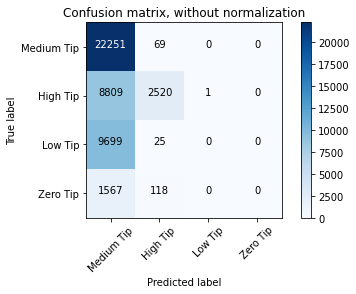

In [0]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[9.96908602e-01 3.09139785e-03 0.00000000e+00 0.00000000e+00]
 [7.77493380e-01 2.22418358e-01 8.82612533e-05 0.00000000e+00]
 [9.97429042e-01 2.57095845e-03 0.00000000e+00 0.00000000e+00]
 [9.29970326e-01 7.00296736e-02 0.00000000e+00 0.00000000e+00]]


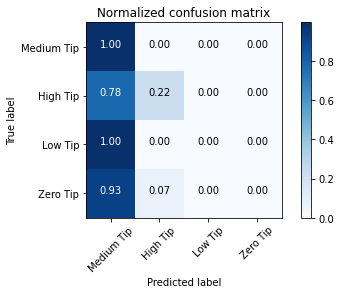

In [0]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Observations

● I noted significant change in the performance of my models as I went through from a simple Decision tree classification Model to Random Forest & NAive Bayes classification model.

● The  Error  for the different models on the Test Data was as follows:

Decesion Tree Test Error = 0.0136932
Random Forest Model Test Error = 0.450254
Naive Baiye Model Test Error = 0.37047

● My understanding from this practice mainly was that real world datasets (considering most dataset are actually real world) are extremely complicated and visualizing this kind of data in order to understand the data better requires efforts. In other words, a simple decision tree classification model is not always sufficient to best model BUT should definitely be the way to start as it gives us a better understanding into the data spread and feature dependencies.

● I also understood the concept of ‘Overfitting’ a lot better as I went through multiple training attempts where my Training accuracy was quite impressive but it did not work well on the Test Data Set. Regulating Hyperparameter techniques to solve these issues is one thing that I am looking forward to.

● Also, I ran the test on the entire dataset using Random Forest and it performed way worse than when I consider 30,000 sample (for all my above experiments). I believe this could be due to the fact that there could have been more noise/outliers in the whole set, or that too much data let to extreme overfitting as Train data was 120000 while test data was only 30000.


#####Code Reference - https://runawayhorse001.github.io/LearningApacheSpark/classification.html#xgboost-gradient-boosted-tree-classification